In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
from datetime import date, timedelta
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Company_Name = "TSLA"
Option_Expiry_Date = '2020-08-14'


#Download Options Data for Expiry Data
ticker = yf.Ticker(Company_Name)

#List Iteration on dates?????
tickeroptioninfo = ticker.option_chain(Option_Expiry_Date)

In [3]:
#Download Price Data
ticker = yf.download(Company_Name, start= datetime.date.today() - timedelta(days=1), end = datetime.date.today())
ticker_p = ticker['Close']
ticker_t_p = ticker_p[1]
ticker_ytd_p = ticker_p[0]
price_change = (ticker_t_p -ticker_ytd_p)/ ticker_ytd_p *100
price_change = round(price_change,4)

ticker_t_p

[*********************100%***********************]  1 of 1 completed


1452.7099609375

In [4]:
#Drop 0/Nans from Percent Changes
ticker_PCP = tickeroptioninfo.puts["percentChange"]
ticker_PCP = ticker_PCP.replace(0, np.nan)
ticker_PCP = ticker_PCP.dropna(how='all', axis=0)

ticker_PCC = tickeroptioninfo.calls["percentChange"]
ticker_PCC = ticker_PCC.replace(0, np.nan)
ticker_PCC = ticker_PCC.dropna(how='all', axis=0)

In [5]:
#Drop 0/Nans from strikes
ticker_strikes_puts = tickeroptioninfo.puts[["strike","percentChange"]]
ticker_strikes_puts = ticker_strikes_puts.replace(0, np.nan)
ticker_strikes_puts_dropna = ticker_strikes_puts.dropna(how='any', axis=0)
ticker_strikes_puts = ticker_strikes_puts_dropna["strike"]

ticker_strikes_calls = tickeroptioninfo.calls[["strike","percentChange"]]
ticker_strikes_calls = ticker_strikes_calls.replace(0, np.nan)
ticker_strikes_calls_dropna = ticker_strikes_calls.dropna(how='any', axis=0)
ticker_strikes_calls = ticker_strikes_calls_dropna["strike"]

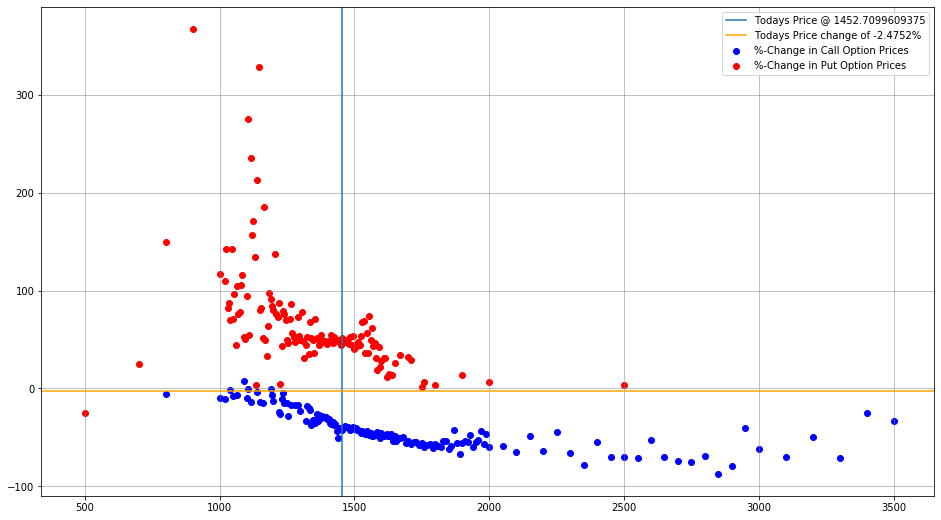

In [6]:
#Scatter plot Calls and Puts with price change
plt.figure(figsize=(16,9))
plt.scatter(x=ticker_strikes_calls, y=ticker_PCC, c='b', label='%-Change in Call Option Prices')
plt.scatter(x=ticker_strikes_puts, y=ticker_PCP, c='r', label ='%-Change in Put Option Prices')
plt.axvline(ticker_t_p, 0, 1, label=f'Todays Price @ {ticker_t_p}')
plt.axhline(price_change, 0, 1, c="orange", label=f"Todays Price change of {price_change}%")
plt.grid(color='grey', linestyle='-', linewidth=0.5)

plt.legend()

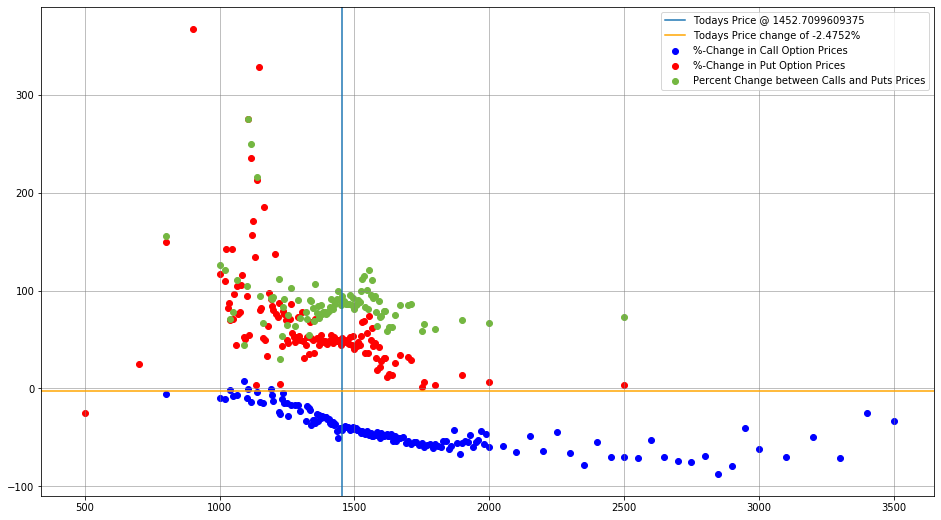

In [7]:
#Put and Call Percent Change overall comparison

ticker_strikes_puts_dropna = ticker_strikes_puts_dropna.rename(columns={'percentChange': 'Puts percentChange'})
ticker_strikes_calls_dropna = ticker_strikes_calls_dropna.rename(columns={'percentChange': 'Calls percentChange'})

Calls_Puts_matched_df = pd.merge(ticker_strikes_puts_dropna, ticker_strikes_calls_dropna)

Calls_Puts_unmatched_df = ticker_strikes_puts_dropna.merge(ticker_strikes_calls_dropna, how='outer')
Calls_Puts_matched_df['percentChange Delta'] = np.abs(Calls_Puts_matched_df['Puts percentChange'] - Calls_Puts_matched_df['Calls percentChange'])

#plot all Percent Change Data

plt.figure(figsize=(16,9))
plt.scatter(x=ticker_strikes_calls, y=ticker_PCC, c='b', label='%-Change in Call Option Prices')
plt.scatter(x=ticker_strikes_puts, y=ticker_PCP, c='r', label ='%-Change in Put Option Prices')
plt.scatter(x=Calls_Puts_matched_df["strike"], y=Calls_Puts_matched_df["percentChange Delta"], c='#74b741', label="Percent Change between Calls and Puts Prices")
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.axvline(ticker_t_p, 0, 1, label=f'Todays Price @ {ticker_t_p}')
plt.axhline(price_change, 0, 1, c="orange", label=f"Todays Price change of {price_change}%")

plt.legend()


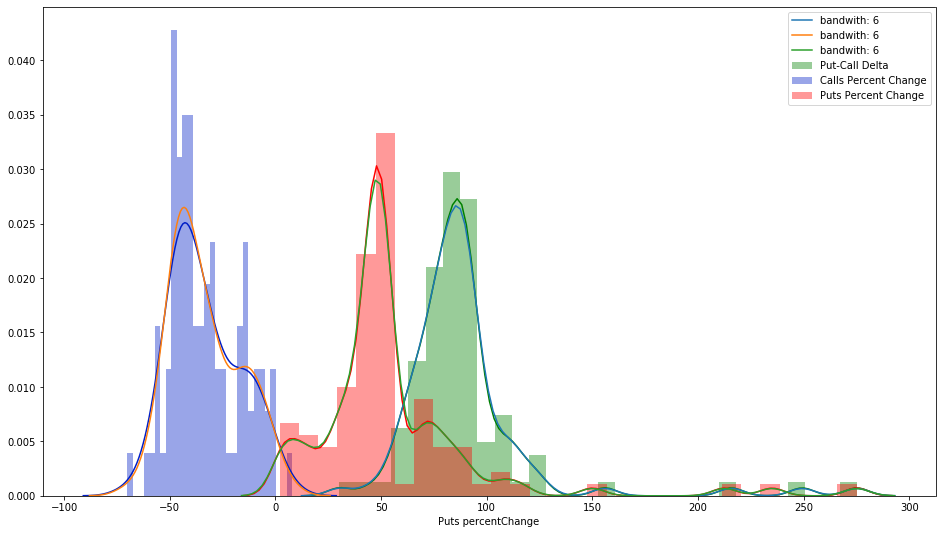

In [8]:
plt.figure(figsize=(16,9))
sns.distplot(Calls_Puts_matched_df["percentChange Delta"], bins=30, color="green", label="Put-Call Delta")
sns.distplot(Calls_Puts_matched_df['Calls percentChange'], bins=30, color="#001ec7",label="Calls Percent Change")
sns.distplot(Calls_Puts_matched_df['Puts percentChange'], bins=30, color="red",label="Puts Percent Change")

sns.kdeplot(Calls_Puts_matched_df["percentChange Delta"], bw=6, label="bandwith: 6")
sns.kdeplot(Calls_Puts_matched_df["Calls percentChange"], bw=6, label="bandwith: 6")
sns.kdeplot(Calls_Puts_matched_df["Puts percentChange"], bw=6, label="bandwith: 6")

plt.legend()

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x=bigC_OI["strike"], y=bigC_OI["openInterest"], c='b', label='Call Open Interest')
plt.scatter(x=bigP_OI["strike"], y=bigP_OI["openInterest"], c='r', label ='Put Open Interest')
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.axvline(ticker_t_p, 0, 1, label=f'Todays Price @ {ticker_t_p}')
plt.axhline(price_change, 0, 1, c="orange", label=f"Todays Price change of {price_change}%")

plt.legend()

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(bigC_OI["strike"], bins=20, color="#001ec7", label="Calls with large OI", kde=True)
sns.distplot(bigP_OI["strike"], bins=20, color="red",label="Puts with large OI", kde=True)
plt.axvline(ticker_t_p, 0, 1, label=f'Todays Price @ {ticker_t_p} and price change of {price_change}%')

plt.legend()

In [ ]:
#Plot with WOI and Midpoint
plt.figure(figsize=(16,9))
sns.distplot(bigC_OI["strike"], bins=20, color="#001ec7", label="Calls with large OI", kde=True)
sns.distplot(bigP_OI["strike"], bins=20, color="red",label="Puts with large OI", kde=True)
plt.axvline(ticker_t_p, 0, 1, c='green',label=f'Todays Price @ {ticker_t_p} and price change of {price_change}%')
plt.axvline(Calls_WOI, 0, 1, c='#7689f5',label='Calls_WOI_Line')
plt.axvline(Puts_WOI, 0, 1, c='#d65463',label='Puts_WOI_Line')
plt.axvline(CP_WMid, 0, 1, c='#e5ff00', label='Calls & Puts Midpoint')

plt.legend()